In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as s

# Meranie pingu 15.6.2020 od 11:23:08 do 12:23:59

# Analyza pingov na google.sk

In [2]:
df = pd.read_csv("./data/google_ping.csv", delimiter = ",")

# Primerný ping 

10.637210555250123

# Graf ping / ms
x os = pingy od 1 po 3638  
y os = ms pingu

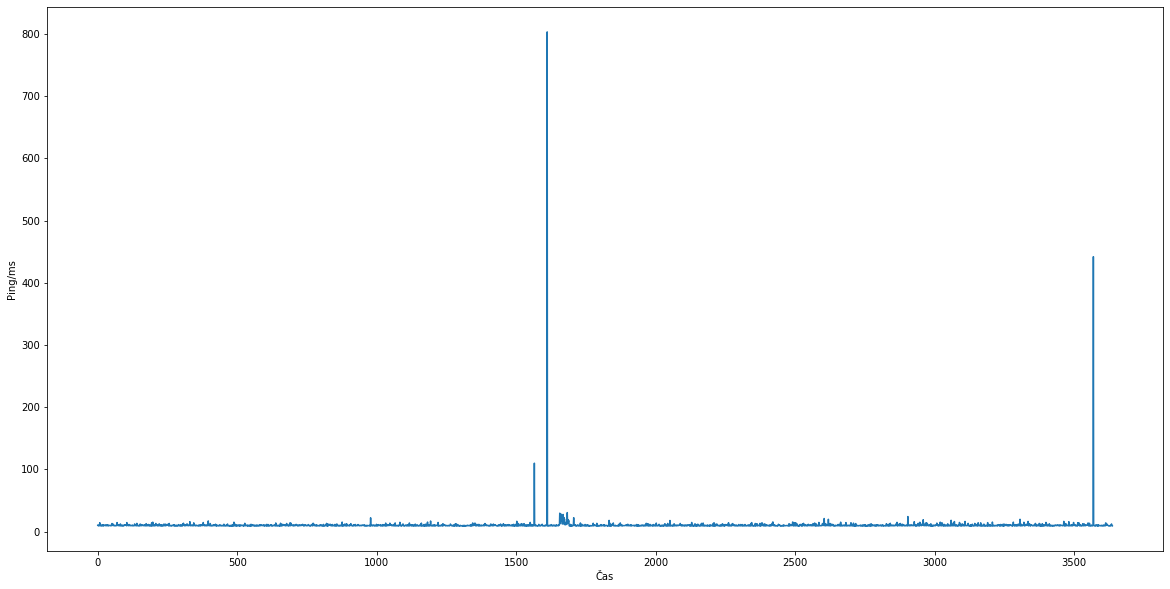

In [3]:
plt.figure(figsize=(20,10))
plt.xlabel("Čas")
plt.ylabel("Ping/ms")
plt.plot(df.index, df['ms'])

### Vidime ze tu tie pingy skacu trosku
vypis pingov kedy boli nad 50 ms

In [4]:
df[df['ms'] > 50]

,date,time,ms
1565,15-6-2020,11:49:21,110.092
1611,15-6-2020,11:50:08,803.067
3569,15-6-2020,12:22:51,441.856


# V datach som pod ms 0 dal pingy ktore sa stratili resp. "Request timeout"


In [5]:
df[df['ms'] == 0]

,date,time,ms


# Analyza pingov na 77.247.224.50
podla speedtestu je 77.247.224.50 isper server

In [6]:
df = pd.read_csv("./data/isper_ping.csv", delimiter = ",")

# Priemerny ping 
3.426085557083907

# Graf ping/ms
x os = pingy od 1 po 3635  
y os = ms pingu

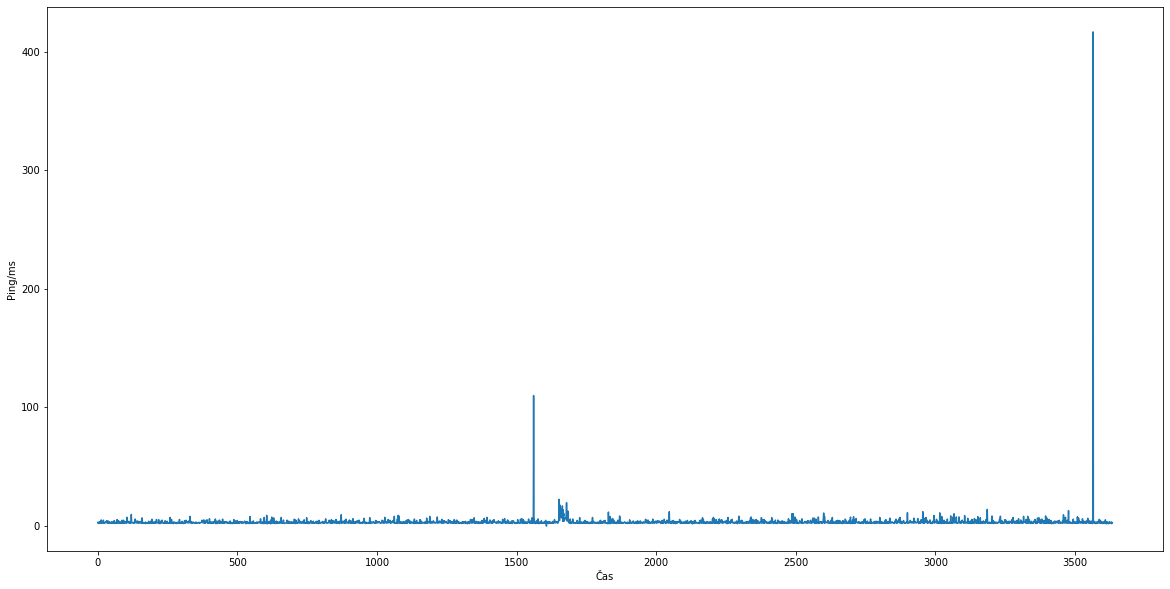

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel("Čas")
plt.ylabel("Ping/ms")
plt.plot(df.index, df['ms'])

### Tu je ten graf tiez podobny ako pri google.sk

In [8]:
df[df['ms'] > 50]

,date,time,ms
1561,15-6-2020,11:49:21,110.059
3565,15-6-2020,12:22:51,416.570


### Tu z nejakeho dovodu nevidime vysoky ping v case 11:50:08, avsak vidime ze nastal vtedy request timeout 

In [9]:
df[df['ms'] == 0]

,date,time,ms
1607,15-6-2020,11:50:08,0.0
